<a href="https://colab.research.google.com/github/aarav2703/Image-Denoising-Code/blob/main/dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Dataset_Exploration_Preprocessing.ipynb

import pandas as pd

# Load the dataset from the /content directory
file_path = '/content/Independent_Medical_Reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())
print(df.info())


  Reference ID  Report Year      Diagnosis Category Diagnosis Sub Category  \
0   MN16-22639         2016              Infectious              Hepatitis   
1   MN16-22638         2016                  Mental        Eating Disorder   
2   MN16-22637         2016         Autism Spectrum         Autism-PDD-NOS   
3   EI16-22636         2016  Prevention/Good Health                    NaN   
4    EI06-5319         2006     Cardiac/Circulatory                    NaN   

                          Treatment Category  \
0                Pharmacy/Prescription Drugs   
1                    Mental Health Treatment   
2                   Autism Related Treatment   
3  Diagnostic Imaging, Screening and Testing   
4                            Cardio Vascular   

                     Treatment Sub Category  \
0                               Anti-virals   
1  Residential Treatment Center - Admission   
2                            Speech Therapy   
3                               Mammography   
4      

In [5]:
# Check for missing values
print(df.isnull().sum())

# Display unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


Reference ID                 0
Report Year                  0
Diagnosis Category          59
Diagnosis Sub Category    1904
Treatment Category         450
Treatment Sub Category    1268
Determination                0
Type                         0
Age Range                 1210
Patient Gender            1210
Findings                    20
dtype: int64
Reference ID: ['MN16-22639' 'MN16-22638' 'MN16-22637' ... 'MN01-5' 'MN01-4' 'EI01-3']
Report Year: [2016 2006 2015 2014 2010 2005 2004 2009 2008 2007 2001 2013 2012 2002
 2003 2011]
Diagnosis Category: ['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Gen

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabetic characters and convert to lowercase
        text = re.sub('[^a-zA-Z]', ' ', text).lower()
        # Tokenize and remove stopwords
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

# Fill missing values in the 'Findings' column with an empty string
df['Findings'] = df['Findings'].fillna('')

# Apply preprocessing to the 'Findings' column
df['cleaned_findings'] = df['Findings'].apply(preprocess_text)

# Check the cleaned text
print(df['cleaned_findings'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    nature statutory criteria case summary enrolle...
1    nature statutory criteria case summary enrolle...
2    nature statutory criteria case summary parent ...
3    nature statutory criteria case summary enrolle...
4    physician patient year old male reported small...
Name: cleaned_findings, dtype: object


In [7]:
# Save the preprocessed data to a new CSV file
df.to_csv('/content/preprocessed_Independent_Medical_Reviews.csv', index=False)

# Optionally download the preprocessed data file to your local machine
from google.colab import files
files.download('/content/preprocessed_Independent_Medical_Reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Model_Building_Evaluation.ipynb

import pandas as pd

# Load the preprocessed dataset from the /content directory
file_path = '/content/preprocessed_Independent_Medical_Reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the preprocessed dataset
print(df.head())
print(df.info())


  Reference ID  Report Year      Diagnosis Category Diagnosis Sub Category  \
0   MN16-22639         2016              Infectious              Hepatitis   
1   MN16-22638         2016                  Mental        Eating Disorder   
2   MN16-22637         2016         Autism Spectrum         Autism-PDD-NOS   
3   EI16-22636         2016  Prevention/Good Health                    NaN   
4    EI06-5319         2006     Cardiac/Circulatory                    NaN   

                          Treatment Category  \
0                Pharmacy/Prescription Drugs   
1                    Mental Health Treatment   
2                   Autism Related Treatment   
3  Diagnostic Imaging, Screening and Testing   
4                            Cardio Vascular   

                     Treatment Sub Category  \
0                               Anti-virals   
1  Residential Treatment Center - Admission   
2                            Speech Therapy   
3                               Mammography   
4      

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling NaNs with empty strings
df['cleaned_findings'] = df['cleaned_findings'].fillna('')

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_findings']).toarray()

# Target variable (e.g., 'Determination' or 'Type')
# For binary classification: 'Overturned' vs 'Upheld'
y = df['Determination'].apply(lambda x: 1 if x == 'Overturned' else 0)  # Binary classification

print(X.shape, y.shape)


(19245, 5000) (19245,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3849

    accuracy                           1.00      3849
   macro avg       1.00      1.00      1.00      3849
weighted avg       1.00      1.00      1.00      3849



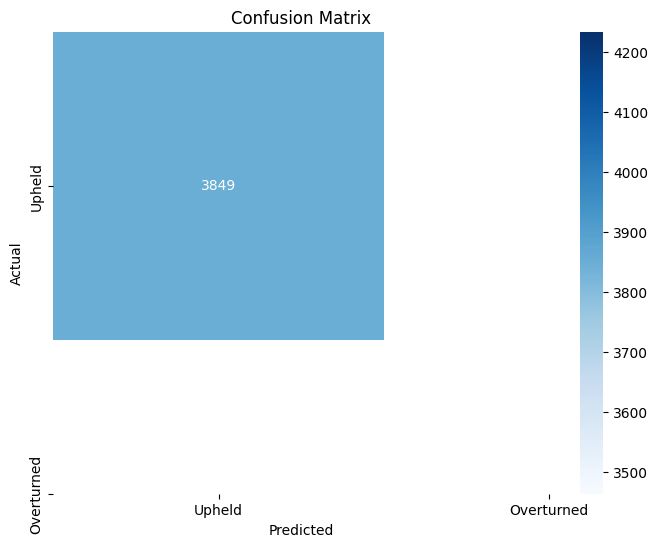

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Upheld', 'Overturned'], yticklabels=['Upheld', 'Overturned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
